   # HR Analytics Project- Understanding the Attrition in HR


# Problem statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# Dataset Discription:

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.
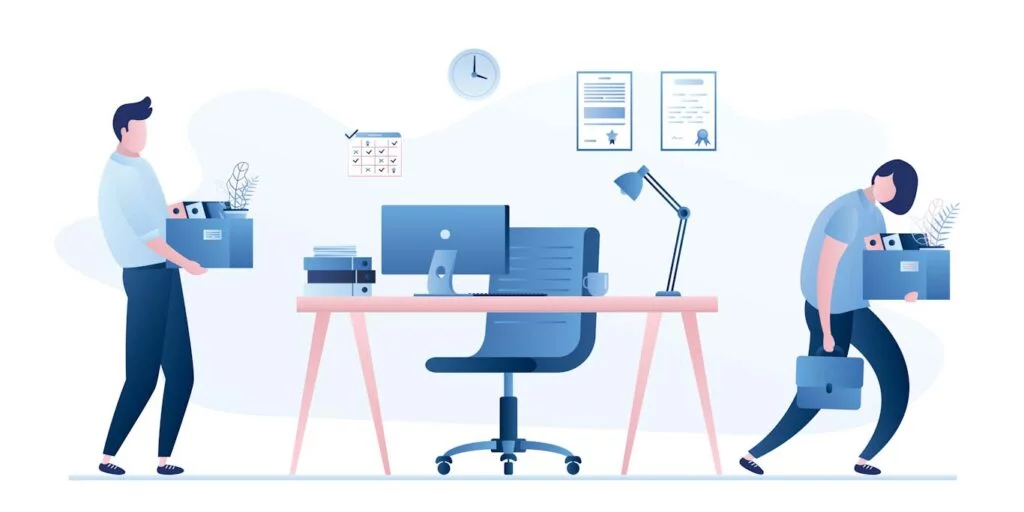


# Reading and Understanding the Data

# Step 1 : Loading the Dataset

In [3]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
hr_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (1).csv')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Attribute Information

Age - this column shows age of an employee.

Attrition -  this column departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.

BusinessTravel - this column shows employee traveling required for business.

DailyRate - this column shows employee daily charges for his work done for company for per day.

Department - this column shows employee department in which he/she working. 

DistanceFromHome - this column shows how far company far from employees house.

Education - this column shows education perceived by employee.

EducationField - this column shows education stream. 

EmployeeCount - this column shows number of employee.

EmployeeNumber - this column shows employee number for employee working in a department of an organization.

EnvironmentSatisfaction - this column shows employee satisfaction for organizations overall working environment.

Gender - this column shows gender  of employee.

HourlyRate - employees perhour charges for working in a department.

JobInvolvement - this column shows which kind of job involved.

JobLevel - this column shows level for job.

JobRole - this column shows what is role assigned to employee.

JobSatisfaction - wheather the employee is satisfied with his or her job.

MaritalStatus - this column shows the marital status of employee.

MonthlyIncome - employee's monthly income.

MonthlyRate - employee's monthly working rate.

NumCompaniesWorked - this column shows employees previous work experience i.e. how many companys  he or she associated previously.

Over18 - wheather employee age is above 18 i.e. company follow no childlabour standard rule. 

OverTime - this shows overtime of employee.

PercentSalaryHike - this shows percentage salary hike of employee.

PerformanceRating - this shows employees performance rating.

RelationshipSatisfaction - this is realtionship with employees

StandardHours - standard working hours 

StockOptionLevel - stock option level

TotalWorkingYears - this column shows employee total working year.

TrainingTimesLastYear - last years training times.

WorkLifeBalance - wheather the job is work life balance.

YearsAtCompany - how many years associated with an organization.

YearsInCurrentRole - for mentioned post how many year employee is working.

YearsSinceLastPromotion - last promotion happend was how many years back.

YearsWithCurrManager - from how many years employee working current Manager.

# Step 2 : Describing Dataset

In [8]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
hr_df.shape

(1470, 35)

Observation - There are 1470 rows and 35 columns in the dataset.

In [11]:
hr_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Step 3 : Visualizing the data 

<AxesSubplot:>

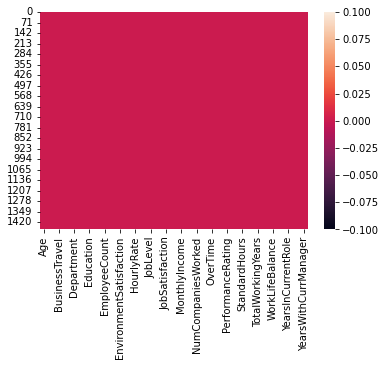

In [12]:
#Heatmap for checking null values
sns.heatmap(hr_df.isnull())

In [14]:
#Checking null Values 
hr_df.isnull().sum().sum()

0

Observations- As we can see in heatmap there is no null entries present in the data set.

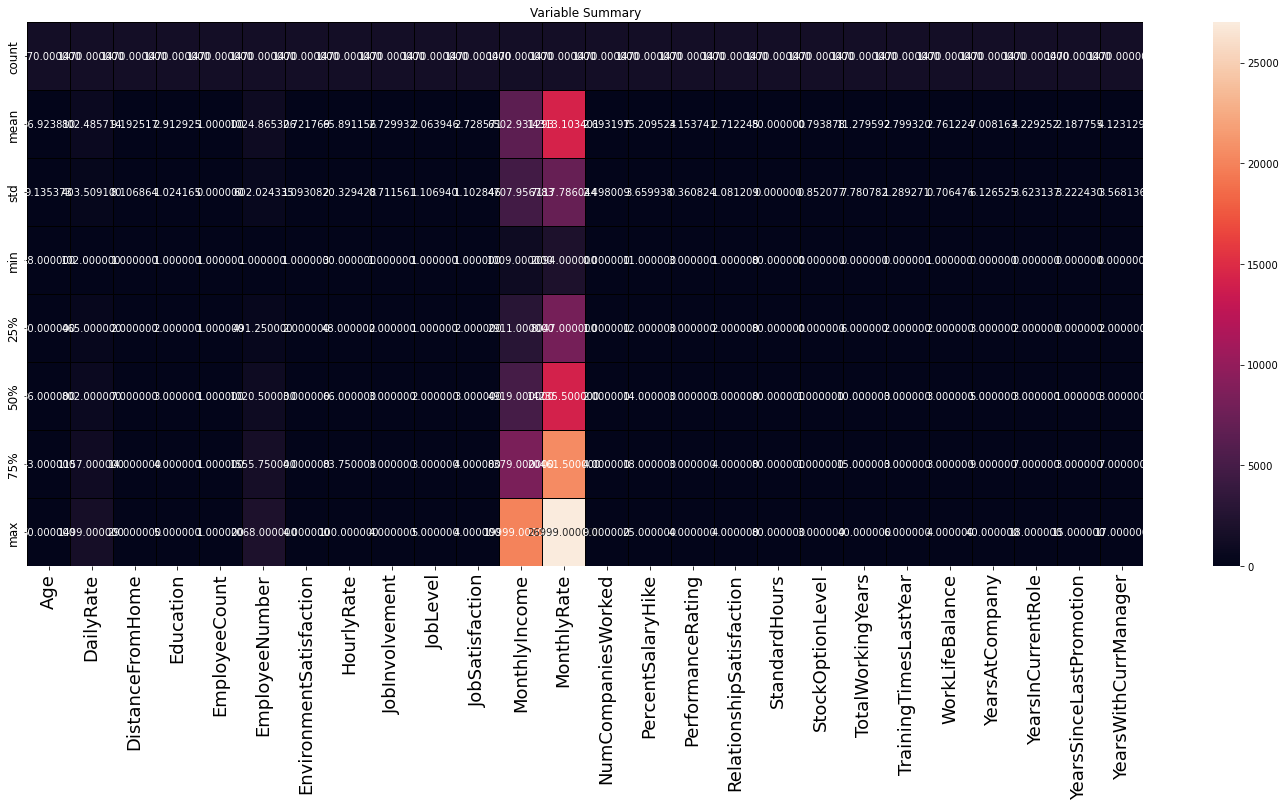

In [18]:
plt.figure(figsize=(25,10))
sns.heatmap(hr_df.describe(),annot=True,linewidth=0.5,linecolor="black",fmt='2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

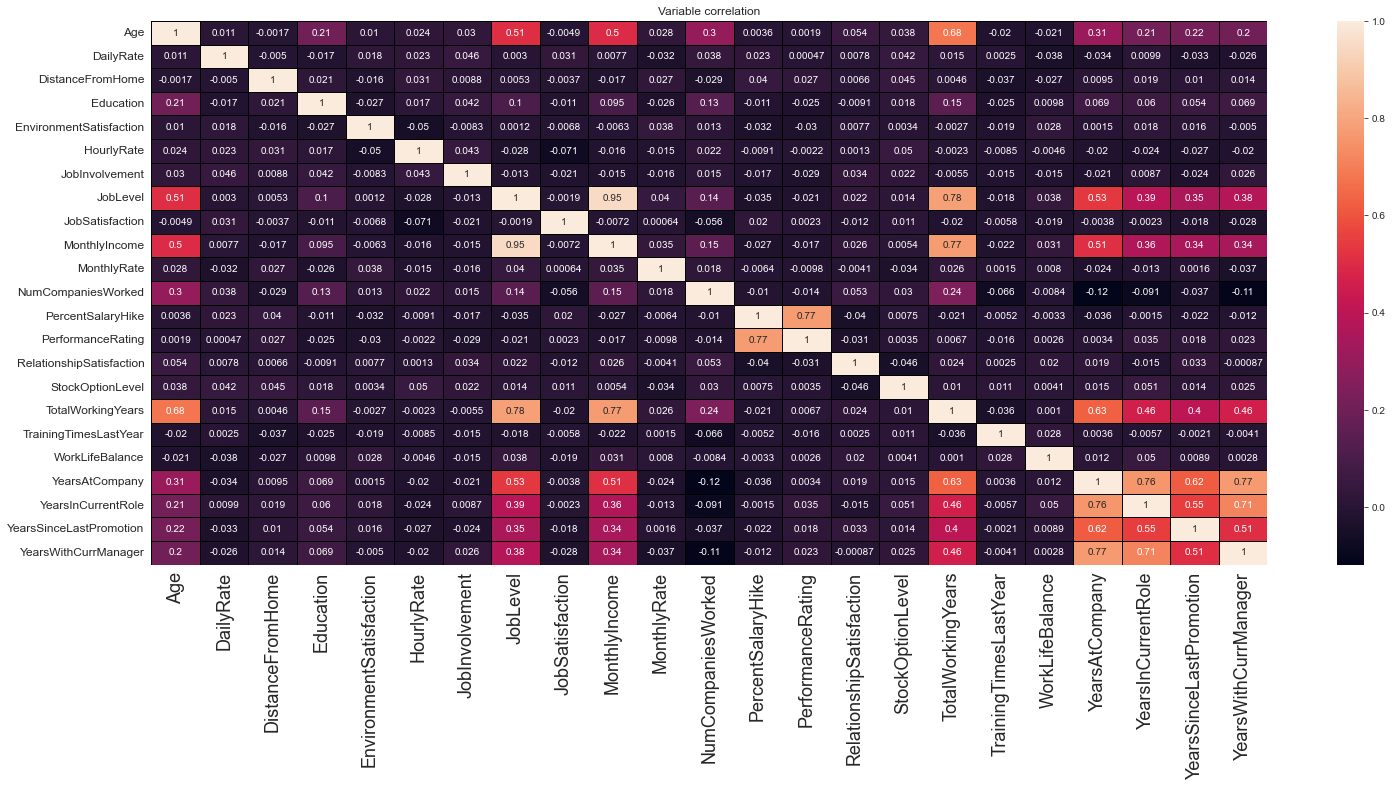

In [36]:
plt.figure(figsize=(25,10))
sns.heatmap(hr_df.corr(),annot=True,linewidth=0.5,linecolor="black")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable correlation")
plt.show()

In [33]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [39]:
hr_df.index

RangeIndex(start=0, stop=1470, step=1)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

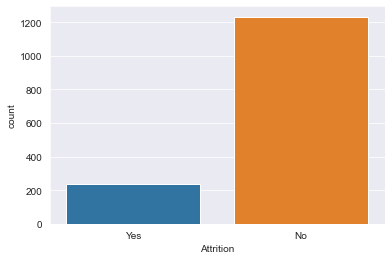

In [27]:
#count plot for showing attrition count.
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = hr_df)

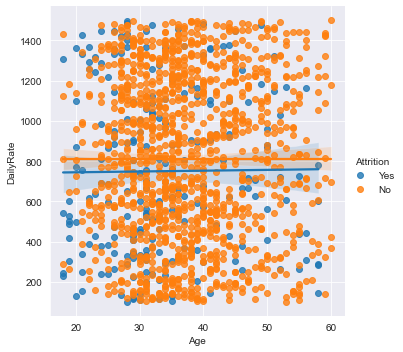

In [29]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = hr_df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

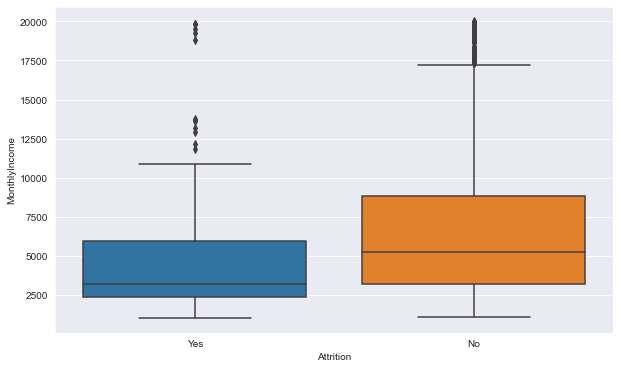

In [30]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = hr_df)

Preprocessing the data 
In the dataset there are 4 irrelevant columns, i.e:EmployeeCount, EmployeeNumber, Over18 and StandardHour. So, I remove these for more accuracy. 

In [32]:
hr_df.drop('EmployeeCount', axis = 1, inplace = True)
hr_df.drop('StandardHours', axis = 1, inplace = True)
hr_df.drop('EmployeeNumber', axis = 1, inplace = True)
hr_df.drop('Over18', axis = 1, inplace = True)
print(hr_df.shape)

(1470, 31)


After removing irrelevant data i have 1470 rows and 31 columns in the dataset.

# Step 4 : Separeting feature variables and target variables from dataset.

In [41]:
y = hr_df.iloc[:, 1]
X = hr_df
X.drop('Attrition', axis = 1, inplace = True)

In [44]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [45]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
In the dataset there are 7 categorical data

# Label Encoding
In the dataset there are 7 categorical data, so i changed them to int data,i.e. we have to create 7 dummy variaple using transform fit method.

In [47]:
dum_BusinessTravel = pd.get_dummies(hr_df['BusinessTravel'],
                                    prefix ='BusinessTravel')
dum_Department = pd.get_dummies(hr_df['Department'],
                                prefix ='Department')
dum_EducationField = pd.get_dummies(hr_df['EducationField'],
                                    prefix ='EducationField')
dum_Gender = pd.get_dummies(hr_df['Gender'],
                            prefix ='Gender', drop_first = True)
dum_JobRole = pd.get_dummies(hr_df['JobRole'],
                             prefix ='JobRole')
dum_MaritalStatus = pd.get_dummies(hr_df['MaritalStatus'],
                                   prefix ='MaritalStatus')
dum_OverTime = pd.get_dummies(hr_df['OverTime'],
                              prefix ='OverTime', drop_first = True)
# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department,
               dum_EducationField, dum_Gender, dum_JobRole,
               dum_MaritalStatus, dum_OverTime], axis = 1)
# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField',
        'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
        axis = 1, inplace = True)
print(X.shape)
print(y.shape)

(1470, 49)
(1470,)


# Step 5 : Splitting data to training and testing
    

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [53]:
X_train.shape,X_test.shape

((1102, 49), (368, 49))

In [55]:
y_train.shape,y_test.shape

((1102,), (368,))

Here i completed with preprocessing now i apply KNN to dataset

# Step 6 : Model building using KNN(KNeighboursClassifier) 
for finding the best number of neighbour with the help of misclassification error.

The optimal number of neighbors is  7 


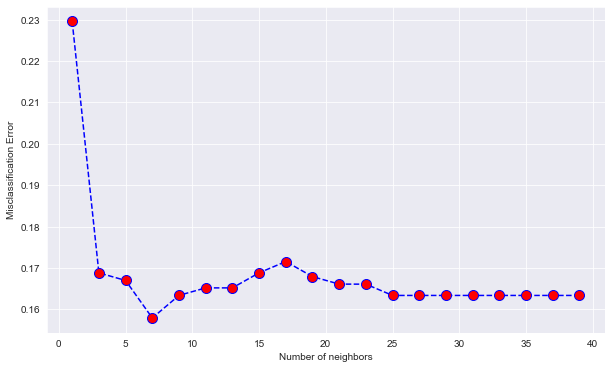

In [56]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []
   
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]
# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)
   
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
   

For Prediction Score

In [57]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
 
def print_score(clf, X_train, y_train, X_test, y_test, train = True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
                y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
                y_train, clf.predict(X_train))))
 
        res = cross_val_score(clf, X_train, y_train,
                              cv = 10, scoring ='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("accuracy score: {0:.4f}\n".format(accuracy_score(
                y_train, clf.predict(X_train))))
        print("----------------------------------------------------------")

    elif train == False:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
                classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(
                confusion_matrix(y_test, clf.predict(X_test))))
        print("accuracy score: {0:.4f}\n".format(
                accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")
         
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print_score(knn, X_train, y_train, X_test, y_test, train = True)
print_score(knn, X_train, y_train, X_test, y_test, train = False)                

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       922
         Yes       0.83      0.19      0.32       180

    accuracy                           0.86      1102
   macro avg       0.85      0.59      0.62      1102
weighted avg       0.86      0.86      0.82      1102


Confusion Matrix: 
 [[915   7]
 [145  35]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0148
accuracy score: 0.8621

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.84      0.96      0.90       311
         Yes       0.14      0.04      0.06        57

    accuracy                           0.82       368
   macro avg       0.49      0.50      0.48       368
weighted avg       0.74      0.82      0.77       368


Confusion Matrix: 
 [[299  12]
 [ 55   2]]

accuracy score: 0.817

# Step 7 : Pickel the model 
    for further use of model i pickel it.

In [59]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [65]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8179347826086957
